In [0]:
# HOW TO MINE DATA AND STORE IT

In [0]:
## Text Mining

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Grab and process raw data
data_path = ("SMSSpamCollection")
sms_raw = pd.read_table("SMSSpamCollection", header=None)   # read table because it is a text file, and header=None because they don't give us headings
sms_raw.columns = ['spam', 'message']   # Therefore we assign columns manually

In [4]:
sms_raw.head(10)

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
sms_raw.spam.value_counts()     # counts how many 'spams' and 'hams'

ham     4825
spam     747
Name: spam, dtype: int64

In [6]:
sms_raw.shape

(5572, 2)

In [7]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'money']       # Usual kywords to spam messages

for key in keywords:
    #the second column is converted to string; if a has message with these keywords, we flag it as true (spam) --> result in a new column with the name of the keyword
    #We add spaces around the key so that we are getting the word, not just pattern matching
    sms_raw[str(key)] = sms_raw.message.str.contains(' ' + str(key) + ' ', case = False)

In [8]:
sms_raw.tail(10)

,spam,message,click,offer,winner,buy,free,cash,urgent,money
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,False,False,False,False,False,False,False,False
5563,ham,Ard 6 like dat lor.,False,False,False,False,False,False,False,False
5564,ham,Why don't you wait 'til at least wednesday to ...,False,False,False,False,False,False,False,False
5565,ham,Huh y lei...,False,False,False,False,False,False,False,False
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,False,False,False,False,True,False,False,False
5567,spam,This is the 2nd time we have tried 2 contact u...,False,False,False,False,False,False,False,False
5568,ham,Will ü b going to esplanade fr home?,False,False,False,False,False,False,False,False
5569,ham,"Pity, * was in mood for that. So...any other s...",False,False,False,False,False,False,False,False
5570,ham,The guy did some bitching but I acted like i'd...,False,False,False,False,False,False,False,False
5571,ham,Rofl. Its true to its name,False,False,False,False,False,False,False,False


In [9]:
sms_raw['allcaps'] = sms_raw.message.str.isupper() # we create a new column to see if the message is all caps or not

In [10]:
sms_raw[sms_raw.allcaps == True].head(10)

,spam,message,click,offer,winner,buy,free,cash,urgent,money,allcaps
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,False,False,False,False,False,False,False,False,True
43,ham,WHO ARE YOU SEEING?,False,False,False,False,False,False,False,False,True
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,False,False,False,False,False,False,False,False,True
263,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,False,False,False,False,False,False,False,False,True
445,ham,HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYARO...,False,False,False,False,False,False,False,False,True
457,ham,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN...",False,False,False,False,False,False,False,False,True
570,ham,WOT U WANNA DO THEN MISSY?,False,False,False,False,False,False,False,False,True
614,ham,THANX4 TODAY CER IT WAS NICE 2 CATCH UP BUT WE...,False,False,False,False,False,False,False,False,True
623,ham,MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...,False,False,False,False,False,False,False,False,True
793,ham,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE...,False,False,False,False,False,False,False,False,True


<AxesSubplot:>

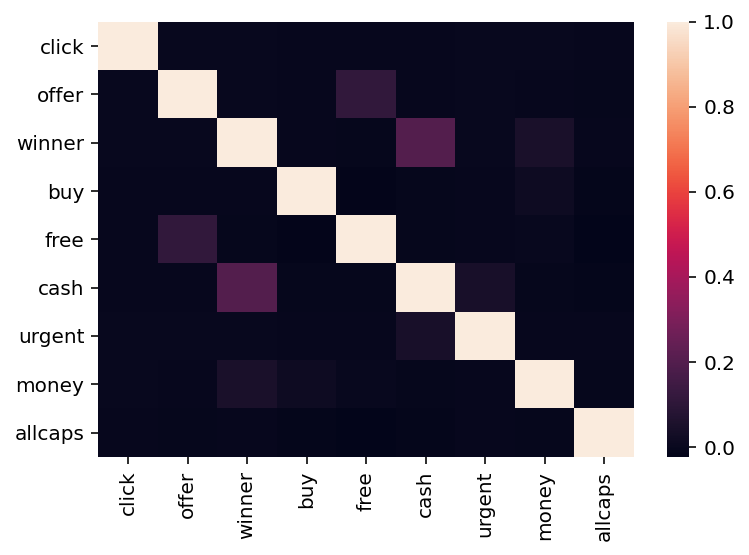

In [11]:
sns.heatmap(sms_raw.corr())

In [12]:
#split the data into feature and target
data = sms_raw[keywords + ['allcaps']]  # concatenate lists to slice sms_raw and grab those columns --> the features, which are a mean to represent the message
target = sms_raw['spam']

In [13]:
data.head(10)

,click,offer,winner,buy,free,cash,urgent,money,allcaps
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False


In [14]:
# The data is binary / boolean, so we use the Bernoulli classifier
# Naive Bayes: we have prior information and with nw information we can update our knowledge and come up with a posteriori information
from sklearn.naive_bayes import BernoulliNB

# Instantiate the model and store it in a new variable
bnb = BernoulliNB()

# Fit the model to the data
bnb.fit(data, target)

# Classify, storing the data in a new variable
y_pred = bnb.predict(data)

# Display the results
print("Number of mislabeled points out of a total of {} points: {}".format(data.shape[0], (target!=y_pred).sum()))

Number of mislabeled points out of a total of 5572 points: 604


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]])

In [0]:
## Network Mining

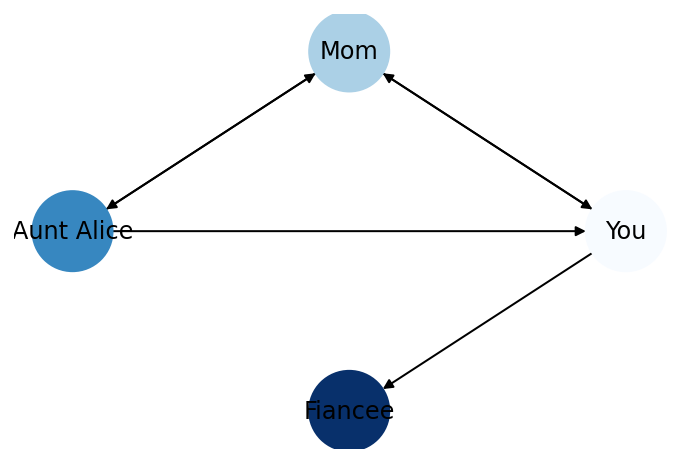

In [19]:
import networkx as nx   # it visualizes graphs using matplotlib

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes. We could have added them all in one list using .all_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')

# Adding edges to connect the nodes. We can also add them individually using .add_edge() --> with no direction
G.add_edges_from([("You", "Mom"), ("You", "Fiancee")])
G.add_edges_from([("Mom", "You"), ("Mom", "Aunt Alice")])
G.add_edges_from([("Aunt Alice", "Mom"), ("Aunt Alice", "You")])

# Drawing the graph
nx.draw_networkx(G,
                 pos = nx.circular_layout(G),    # positions the nodes relative to each other
                 node_size = 1600,
                 cmap = plt.cm.Blues,            # the color palette to use to color the nodes   
                 node_color = range(len(G))      # the number of shades of color to use
                )

plt.axis('off')
plt.show()

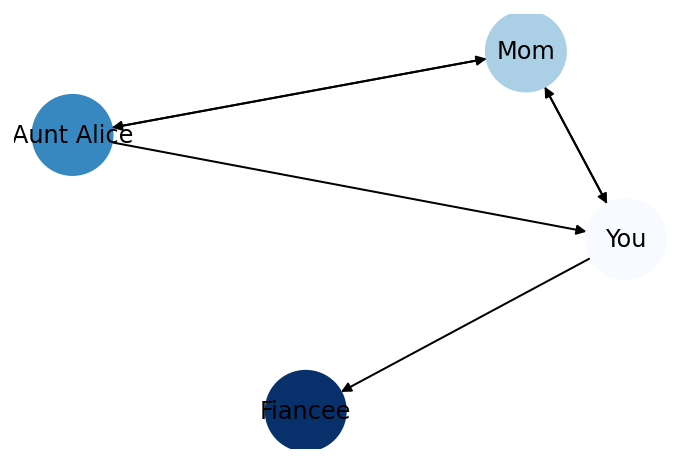

In [20]:
# Drawing the graph
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),      # positions the nodes relative to each other
                 node_size = 1600,
                 cmap = plt.cm.Blues,            # the color palette to use to color the nodes   
                 node_color = range(len(G))      # the number of shades of color to use
                )

plt.axis('off')
plt.show()

In [23]:
print('This graph has {} nodes and {} edges.'.format(G.number_of_nodes(), G.number_of_edges()))
print('The "Aunt Alice" node has an in-degree of {} and an out-degree of {}.'.format(G.in_degree('Aunt Alice'), G.out_degree('Aunt Alice')))
print('The nodes are {}.'.format(G.nodes()))
print('The edges are {}.'.format(G.edges()))
print('The betweenness centrality scores are {}.'.format(nx.betweenness_centrality(G)))   # compute the shortest-path betweenness centrality for nodes --> the more important nodes to the network (critical path) have a higher value
print('The node degrees are {}.'.format(G.degree()))      # the node degree is the number of edges adjacent to that node

This graph has 4 nodes and 6 edges.
The "Aunt Alice" node has an in-degree of 1 and an out-degree of 2.
The nodes are ['You', 'Mom', 'Aunt Alice', 'Fiancee'].
The edges are [('You', 'Mom'), ('You', 'Fiancee'), ('Mom', 'You'), ('Mom', 'Aunt Alice'), ('Aunt Alice', 'Mom'), ('Aunt Alice', 'You')].
The betweenness centrality scores are {'You': 0.3333333333333333, 'Mom': 0.16666666666666666, 'Aunt Alice': 0.0, 'Fiancee': 0.0}.
The node degrees are [('You', 4), ('Mom', 4), ('Aunt Alice', 3), ('Fiancee', 1)].


In [26]:
print("Simple paths: ", nx.all_pairs_node_connectivity(G), '\n')
print("Shortest paths: ",nx.all_pairs_shortest_path(G))

Simple paths:  {'You': {'Mom': 1, 'Aunt Alice': 1, 'Fiancee': 1}, 'Mom': {'You': 2, 'Aunt Alice': 1, 'Fiancee': 1}, 'Aunt Alice': {'You': 2, 'Mom': 2, 'Fiancee': 1}, 'Fiancee': {'You': 0, 'Mom': 0, 'Aunt Alice': 0}} 

Shortest paths:  <generator object all_pairs_shortest_path at 0x7f19cc824510>


In [0]:
## Python Matrix Libraries

In [27]:
# creating n dimensional array
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[7,8,9],[10,11,12]])

In [28]:
np.dot(A,B.T)  # dot product ith B transpose

array([[ 50,  68],
       [122, 167]])

In [29]:
C = A**2        # power of 2
C.diagonal()    # diagonal elements

array([ 1, 25])

In [30]:
D = A-1 # subtracts each element of A per 1

In [31]:
# Convert array to matrix
A = np.matrix(A)
B = np.matrix(B)
C = np.matrix(C)
D = np.matrix(D)

In [32]:
A.nonzero()    # returns the indices of elements which are non-zero --> array with each elements rows and columns

(array([0, 0, 0, 1, 1, 1]), array([0, 1, 2, 0, 1, 2]))

In [33]:
A-B

matrix([[-6, -6, -6],
        [-6, -6, -6]])

In [34]:
A+B

matrix([[ 8, 10, 12],
        [14, 16, 18]])

In [35]:
A.dot(B.T)    #returns the same as in array

matrix([[ 50,  68],
        [122, 167]])

In [36]:
print(A.sum(), A.mean(), A.std(), A.var())

21 3.5 1.707825127659933 2.9166666666666665


In [37]:
pd.DataFrame(A)  #converts to dataframe

,0,1,2
0,1,2,3
1,4,5,6


In [0]:
## SQL